# Multilayer Neural Network in TensorFlow

### One Hidden Layer NN 



<img src="images/two_layer_nn_2.png" alt="Drawing" style="width:60%;height:60%"/>

In [1]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import numpy as np

mnist = input_data.read_data_sets("/tmp/tensorflow/mnist/input_data", one_hot=True, reshape=False)

# The features are already scaled and the data is shuffled
train_features = mnist.train.images
test_features = mnist.test.images
print(train_features.shape)
print(test_features.shape)

train_labels = mnist.train.labels.astype(np.float32)
test_labels = mnist.test.labels.astype(np.float32)
print(train_labels.shape)
print(test_labels.shape)


Extracting /tmp/tensorflow/mnist/input_data/train-images-idx3-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data/train-labels-idx1-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data/t10k-images-idx3-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data/t10k-labels-idx1-ubyte.gz
(55000, 28, 28, 1)
(10000, 28, 28, 1)
(55000, 10)
(10000, 10)


Deep neural networks use multiple layers with each layer requiring it's own weight and bias. The 'hidden_layer' weight and bias is for the hidden layer. The 'out' weight and bias is for the output layer. If the neural network were deeper, there would be weights and biases for each additional layer.

> The MNIST data is made up of 28px by 28px images with a single channel (i.e., one color). The <b style='color:red'>tf.reshape()</b> function above reshapes the 28px by 28px matrices in x into row vectors of 784px.


In [13]:
# tf Graph input
x = tf.placeholder("float", [None, 28, 28, 1])
y = tf.placeholder("float", [None, n_classes])
print(x)
x_flat = tf.reshape(x, [-1, n_input])
print(x_flat)

Tensor("Placeholder_4:0", shape=(?, 28, 28, 1), dtype=float32)
Tensor("Reshape_5:0", shape=(?, 784), dtype=float32)


In [14]:
# Parameters
learning_rate = 0.001
training_epochs = 5
batch_size = 128  # Decrease batch size if you don't have enough memory
display_step = 1

n_input = 784  # MNIST data input (img shape: 28*28)
n_classes = 10  # MNIST total classes (0-9 digits)

n_hidden_layer = 256 # layer number of features

# Store layers weight & bias
weights = {
    'hidden_layer': tf.Variable(tf.random_normal([n_input, n_hidden_layer])),
    'out': tf.Variable(tf.random_normal([n_hidden_layer, n_classes]))
}
biases = {
    'hidden_layer': tf.Variable(tf.random_normal([n_hidden_layer])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

In [15]:
hidden_layer = tf.add(tf.matmul(x_flat, weights['hidden_layer']), biases['hidden_layer'])
hidden_layer_out = tf.nn.relu(hidden_layer)

logits = tf.add(tf.matmul(hidden_layer_out, weights['out']), biases['out'])


You've seen the linear function  <b style='color:red'>tf.add(tf.matmul(x_flat, weights['hidden_layer']), biases['hidden_layer'])</b> before, also known as  <b style='color:red'>xw + b</b>. Combining linear functions together using a ReLU will give you a two layer network.

### Optimizer

In [16]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)

### Session

ep 1 i 0 182.768
ep 1 i 60 113.544
ep 1 i 120 89.2423
ep 1 i 180 73.7277
ep 1 i 240 62.1535
ep 1 i 300 53.7206
ep 1 i 360 47.0001
ep 1 i 420 41.8398
ep 2 i 0 41.1746
ep 2 i 60 37.2542
ep 2 i 120 34.0824
ep 2 i 180 31.5073
ep 2 i 240 29.3111
ep 2 i 300 27.4517
ep 2 i 360 25.9311
ep 2 i 420 24.5025
ep 3 i 0 24.3267
ep 3 i 60 23.1412
ep 3 i 120 22.1078
ep 3 i 180 21.1699
ep 3 i 240 20.3347
ep 3 i 300 19.6054
ep 3 i 360 18.9304
ep 3 i 420 18.3114
ep 4 i 0 18.2076
ep 4 i 60 17.6211
ep 4 i 120 17.0676
ep 4 i 180 16.5983
ep 4 i 240 16.1581
ep 4 i 300 15.7754
ep 4 i 360 15.3986
ep 4 i 420 15.0465
ep 5 i 0 14.9915
ep 5 i 60 14.655
ep 5 i 120 14.3724
ep 5 i 180 14.0913
ep 5 i 240 13.8349
ep 5 i 300 13.5316
ep 5 i 360 13.284
ep 5 i 420 13.0559


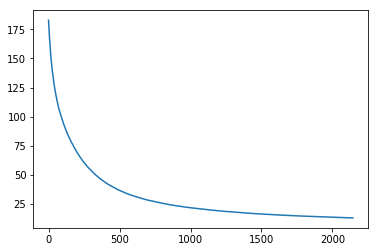

In [18]:
import matplotlib.pyplot as plt

init = tf.global_variables_initializer()
losses = []
with tf.Session() as sess:
    sess.run(init)
    
    for ep in range(1, training_epochs+1):
        total_batch = int(mnist.train.num_examples/batch_size)
        
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
#             print(batch_x.shape)
            sess.run(optimizer, feed_dict={x:batch_x, y:batch_y})
            output = sess.run(loss, feed_dict={x:test_features, y:test_labels})
            losses.append(output)
            
            if i % 60 == 0:
                print("ep", ep, 'i', i, output)
            
plt.plot(losses)
plt.show()
    

The MNIST library in TensorFlow provides the ability to receive the dataset in batches. Calling the <b style='color:red'>mnist.train.next_batch()</b> function returns a subset of the training data.

### Two Hidden Layer NN 


<img src="images/two_hidden_layer.png" alt="Drawing" style="width:60%;height:60%"/>

In [20]:
def get_data():
    Y=[]
    X=[]
    first=True
    for line in open('../data/fer2013/fer2013.csv'):
        if first:
            first=False
        else:
            row=line.split(',')
            y = int(row[0])

            Y.append(y)
            X.append([int(p) for p in row[1].split()])
    X, Y = np.array(X) / 255.0, np.array(Y)  
    return X, Y

def error_rate(T, P):
    return np.mean(T != P)

def y2indicator(y, dims):
    N = len(y)
    y = y.astype(np.int32)
    ind = np.zeros((N, dims))
    for i in range(N):
        ind[i, y[i]] = 1
    return ind

In [22]:
from sklearn.utils import shuffle

XA, YA = get_data()
# XA, YA = shuffle(XA, YA)

XO, YO = XA[YA!=1, :], YA[YA!=1]
X1 = XA[YA==1, :]
X1 = np.repeat(X1, 9, axis=0)
XA = np.vstack([XO, X1])
YA = np.concatenate((YO, [1]*len(X1)))

XA, YA = shuffle(XA, YA)
print(XA.shape)
print(YA.shape)


(40263, 2304)
(40263,)


In [ ]:
learning_rate = 10e-7
reg = 0.01
max_iter = 1000
print_period = 10
        
N, D = XA.shape
K = len(set(YA))

print("X.shape:", XA.shape)
print("N:", N)
print("D:", D)
print("K:", K)

        
# split data into training set and validation set
Xtrain, Ytrain = XA[:-1000], YA[:-1000]
Xtest, Ytest= XA[-1000:], YA[-1000:]
        
# one-hot-encoding the labels for both training set and validation set
Ytrain_ind = y2indicator(Ytrain, K)
Ytest_ind = y2indicator(Ytest, K)

# TODO: try other batch and the whole training set
batch_sz = 500

print("batch_sz:", batch_sz)
n_batches = int(N / batch_sz)

print("n_batches:", n_batches)

M1 = 300
M2 = 100
# K = 10

W1_init = np.random.randn(D, M1) / 28
b1_init = np.zeros(M1)
W2_init = np.random.randn(M1, M2) / np.sqrt(M1 + M2)
b2_init = np.zeros(M2)
W3_init = np.random.randn(M2, K) / np.sqrt(M2 + K)
b3_init = np.zeros(K)

X = tf.placeholder(tf.float32, shape=(None, D), name = 'X')
T = tf.placeholder(tf.float32, shape=(None, K), name = 'T')

W1 = tf.Variable(W1_init.astype(np.float32))
b1 = tf.Variable(b1_init.astype(np.float32))
W2 = tf.Variable(W2_init.astype(np.float32))
b2 = tf.Variable(b2_init.astype(np.float32))
W3 = tf.Variable(W3_init.astype(np.float32))
b3 = tf.Variable(b3_init.astype(np.float32))

# forward
Z1 = tf.nn.relu(tf.matmul(X, W1) + b1)
Z2 = tf.nn.relu(tf.matmul(Z1, W2) + b2)
Yish = tf.matmul(Z2, W3) + b3

# establish loss/cost function
loss = tf.reduce_sum(tf.nn.softmax_cross_entropy_with_logits(logits=Yish, labels=T))
print("loss, ", loss)

# establish the gradient descent optimizer with respect to the loss function
train_op = tf.train.RMSPropOptimizer(learning_rate, decay=0.99, momentum=0.9).minimize(loss)
print("train_op: ", train_op)

#
predict_op = tf.argmax(Yish, 1)
print("predict_op: ", predict_op)

#
LL = []
init = tf.global_variables_initializer()
with tf.Session() as session:
    session.run(init)
    
    for i in range(max_iter):
        for j in range(n_batches):
  
            Xbatch = Xtrain[j * batch_sz : (j * batch_sz + batch_sz),]
            Ybatch = Ytrain_ind[j * batch_sz : (j * batch_sz + batch_sz),]
            
            session.run(train_op, feed_dict={X: Xbatch, T:Ybatch})
            if j % print_period == 0:
                test_cost = session.run(loss, feed_dict={X: Xtest, T: Ytest_ind})
                prediction = session.run(predict_op, feed_dict={X: Xtest})
                err = error_rate(prediction, Ytest)
                print("Cost / err at iteration i=%d, batch j=%d: %.3f / %.3f" % (i, j, test_cost, err))
                LL.append(test_cost)
                
plt.plot(LL)
plt.show()

# increase max_iter and notice how the test cost starts to increase.
# are we overfitting by adding that extra layer?
# how would you add regularization to this model?